# Basics of Logistic Regression

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Importing data from csv files
raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1U52uPJimdoXtNGYXw4CLBsjp8JZsIjxgKZ7_aC7GRDo/export?gid=351344892&format=csv")
raw_data.head()

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No


In [3]:
# Now we will convert the yes and no to 0 and 1 for quantative analysis purpose
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1, 'No':0})
data.head()

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0


### Plotting the data

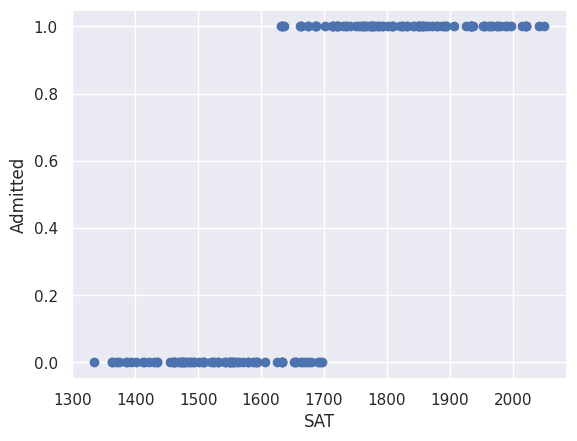

In [4]:
x1 = data['SAT']
y = data['Admitted']
plt.scatter(x1, y)
plt.xlabel('SAT')
plt.ylabel('Admitted')
plt.show();

### Logistic Regression

In [5]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
log_result = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


### Summary

In [6]:
log_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.7992
Time:                        19:47:26   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

# Logistic Regression with multiple independent variables

In [7]:
# Importing data from csv files
binary_raw_data = pd.read_csv("https://docs.google.com/spreadsheets/d/1A82LKlN0rIcttaSjJopK23aD9YTILM6l2SIvi6LogOY/export?gid=830848238&format=csv")
binary_raw_data.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [8]:
data_new = binary_raw_data.copy()
data_new['Admitted'] = data_new['Admitted'].map({'Yes':1, 'No':0})
data_new['Gender'] = data_new['Gender'].map({'Female':1, 'Male':0})
data_new.head()

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0


In [9]:
x1 = data_new[['SAT', 'Gender']]
y = data_new['Admitted']

In [10]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y, x)
log_result = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


In [11]:
log_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Wed, 21 Aug 2024   Pseudo R-squ.:                  0.8249
Time:                        19:47:27   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

#### Accuracy

In [12]:
log_result.predict()

array([2.24098643e-06, 9.98264069e-01, 9.99997581e-01, 2.25470272e-01,
       2.48392751e-02, 9.92249420e-01, 9.96544212e-01, 9.99963261e-01,
       9.99971204e-01, 1.48031753e-02, 9.99875812e-01, 9.99951185e-01,
       7.60867651e-01, 2.33384671e-06, 5.96283811e-01, 9.99834996e-01,
       1.14446654e-01, 1.18626448e-01, 5.05147726e-01, 9.99865308e-01,
       9.99999366e-01, 9.99997048e-01, 1.71939595e-04, 5.61635704e-03,
       9.68663798e-01, 9.99644611e-01, 4.84851641e-01, 9.91962775e-01,
       9.99828160e-01, 9.94609023e-01, 1.15028367e-04, 8.32585363e-01,
       2.47449367e-01, 9.99998840e-01, 9.98847293e-01, 9.99372736e-01,
       3.12716933e-01, 9.99932453e-01, 2.32639633e-01, 5.29744519e-05,
       1.95739604e-02, 4.54521689e-01, 9.99956956e-01, 2.97763113e-06,
       9.94178832e-01, 1.77714430e-05, 9.93914956e-01, 2.29360536e-04,
       3.30501192e-04, 6.89914934e-03, 4.24966754e-03, 9.99999657e-01,
       9.23952460e-01, 2.28569785e-02, 9.99994550e-01, 5.47478329e-06,
      

In [13]:
cm_df = pd.DataFrame(log_result.pred_table())
cm_df.columns = ['Predicted 0', 'Predicted 1']
cm_df = cm_df.rename(index={0:'Actual 0', 1:'Actual 1'})
cm_df
# log_result.pred_table()

,Predicted 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0
